In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('기온.csv', encoding='cp949')
len(df)

17471

In [6]:
365 * 24 * 2

17520

In [8]:
df.dtypes

지점          int64
지점명        object
일시         object
기온(°C)    float64
dtype: object

In [10]:
df.head()

,지점,지점명,일시,기온(°C)
0,108,서울,2023-01-01 01:00,1.5
1,108,서울,2023-01-01 02:00,1.5
2,108,서울,2023-01-01 03:00,1.6
3,108,서울,2023-01-01 04:00,1.5
4,108,서울,2023-01-01 05:00,0.8


In [12]:
data = df[['지점명', '일시', '기온(°C)']]
data.head()

,지점명,일시,기온(°C)
0,서울,2023-01-01 01:00,1.5
1,서울,2023-01-01 02:00,1.5
2,서울,2023-01-01 03:00,1.6
3,서울,2023-01-01 04:00,1.5
4,서울,2023-01-01 05:00,0.8


In [14]:
data['지점명'] == '서울'

0         True
1         True
2         True
3         True
4         True
         ...  
17466    False
17467    False
17468    False
17469    False
17470    False
Name: 지점명, Length: 17471, dtype: bool

In [16]:
is_seoul = data['지점명'] == '서울'
seoul = data[is_seoul]
seoul

,지점명,일시,기온(°C)
0,서울,2023-01-01 01:00,1.5
1,서울,2023-01-01 02:00,1.5
2,서울,2023-01-01 03:00,1.6
3,서울,2023-01-01 04:00,1.5
4,서울,2023-01-01 05:00,0.8
...,...,...,...
8731,서울,2023-12-30 20:00,1.4
8732,서울,2023-12-30 21:00,1.6
8733,서울,2023-12-30 22:00,1.7
8734,서울,2023-12-30 23:00,1.9


In [18]:
gj = data[data['지점명']=='광주']
gj

,지점명,일시,기온(°C)
8736,광주,2023-01-01 01:00,-0.5
8737,광주,2023-01-01 02:00,-0.7
8738,광주,2023-01-01 03:00,-0.9
8739,광주,2023-01-01 04:00,-1.5
8740,광주,2023-01-01 05:00,-1.6
...,...,...,...
17466,광주,2023-12-30 20:00,6.3
17467,광주,2023-12-30 21:00,6.5
17468,광주,2023-12-30 22:00,6.6
17469,광주,2023-12-30 23:00,6.1


In [20]:
365 * 24

8760

In [22]:
temp = []
for i in seoul['일시']:
    temp.append(i.split(' ')[0])
lack_seoul = []
uni_temp = set(temp)
for i in uni_temp:
    if temp.count(i) != 24:
        lack_seoul.append(i)
print(lack_seoul)

['2023-12-31', '2023-01-01']


In [24]:
temp = []
for i in gj['일시']:
    temp.append(i.split(' ')[0])
lack_gj = []
uni_temp = set(temp)
for i in uni_temp:
    if temp.count(i) != 24:
        lack_gj.append(i)
print(lack_gj)

['2023-12-31', '2023-01-01', '2023-12-14']


In [44]:
lack_data = list(lack_seoul + lack_gj)
for i in lack_data:
    seoul = seoul[seoul['일시'].str.split(' ').str[0] != i]
    gj = gj[gj['일시'].str.split(' ').str[0] != i]

In [46]:
print(len(seoul))
print(len(gj))

8688
8688


In [32]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8688 entries, 23 to 8734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점명     8688 non-null   object 
 1   일시      8688 non-null   object 
 2   기온(°C)  8688 non-null   float64
dtypes: float64(1), object(2)
memory usage: 529.5+ KB


In [42]:
seoul['일시'].str.split(' ').str[0]

23      2023-01-02
24      2023-01-02
25      2023-01-02
26      2023-01-02
27      2023-01-02
           ...    
8730    2023-12-30
8731    2023-12-30
8732    2023-12-30
8733    2023-12-30
8734    2023-12-30
Name: 일시, Length: 8688, dtype: object

In [48]:
import numpy as np

In [226]:
time = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', 
        '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']

zeros = np.zeros((24,2))
df = pd.DataFrame(zeros, index=time, columns=['seoul', 'gwangju'])
df

,seoul,gwangju
00:00,0.0,0.0
01:00,0.0,0.0
02:00,0.0,0.0
03:00,0.0,0.0
04:00,0.0,0.0
05:00,0.0,0.0
06:00,0.0,0.0
07:00,0.0,0.0
08:00,0.0,0.0
09:00,0.0,0.0


In [232]:
max_idx = []
for i in range(0, len(seoul)-48, 24):
    max_idx.append(seoul.iloc[i:i+24,2].idxmax())
for i in max_idx:
    df.loc[seoul.iloc[i,1].split(' ')[1], 'seoul'] += 1

In [292]:
max_idx = []
for i in range(0, len(gj), 24):
    max_idx.append(gj.iloc[i:i+24,2].idxmax())
for i in max_idx:
    df.loc[gj.iloc[i,1].split(' ')[1], 'gwangju'] += 1

In [290]:
gj.drop(['index'], axis=1, inplace=True)

In [272]:
gj.reset_index(inplace=True)

In [142]:
seoul.iloc[1, 1].split(' ')[1]

'01:00'

In [238]:
df.index

Index(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00',
       '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00',
       '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'],
      dtype='object')

In [186]:
df.loc['00:00', 'seoul']=5

In [296]:
import matplotlib.pyplot as plt

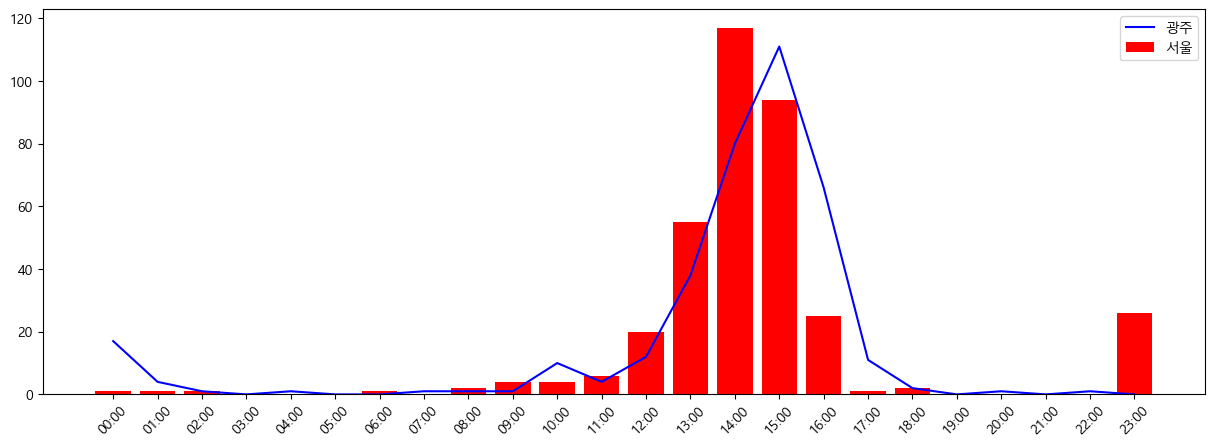

In [314]:
from matplotlib import font_manager, rc
font_path = 'malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

plt.figure(figsize=(15,5))
plt.bar(df.index, df['seoul'], color = 'red')
plt.plot(df.index, df['gwangju'], color = 'blue')
plt.xticks(rotation=45)
plt.legend(['광주', '서울'])
plt.show()